# Linear Regression

### Linear Regression is a most commonly used machine learning technique to predict a target value based upon the relationship between the target value and multiple (or single) independent predictor features.

#### To understand the concept, we take California Housing dataset available within scikit-learn module. 

#### The objective is to predict the price of houses based on the given features. 

#### Let us store the dataset into a dataframe and list its features and the target value.

**Import Modules**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_california_housing

In [14]:
housing = fetch_california_housing()

In [15]:
print(housing.data.shape)       # (20640, 8)
print(housing.feature_names)  # Column names
print(housing.DESCR)        # brief desc.

(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds

In [16]:
df = pd.DataFrame(housing.data)
print(df.head())

        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25



#### We observe top 5 samples of the dataset stored in dataframe df. 

#### Next, we assign the actual names of features to the dataframe columns.

In [17]:
df.columns = housing.feature_names
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


#### We now have a complete dataframe with all the predictors and the target. 

#### Therefore, let us split the dataset into training and testing data where we consider 77% of the data under training.

In [18]:
X = df

y = housing.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.33, # Test data (33%)
        random_state = 42) # assign random_state to any value, to get same samples on each fresh run

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (13828, 8)
y_train shape: (13828,)


#### With training and test data in hand, it's time to fit the Linear Regression model to make the necessary prediction of the data.

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_test = lm.predict(X_test)

#### We have the predicted data stored in pred_test. Let us draw a scatter plot between predicted price and the actual price along with the best line of fit as shown.

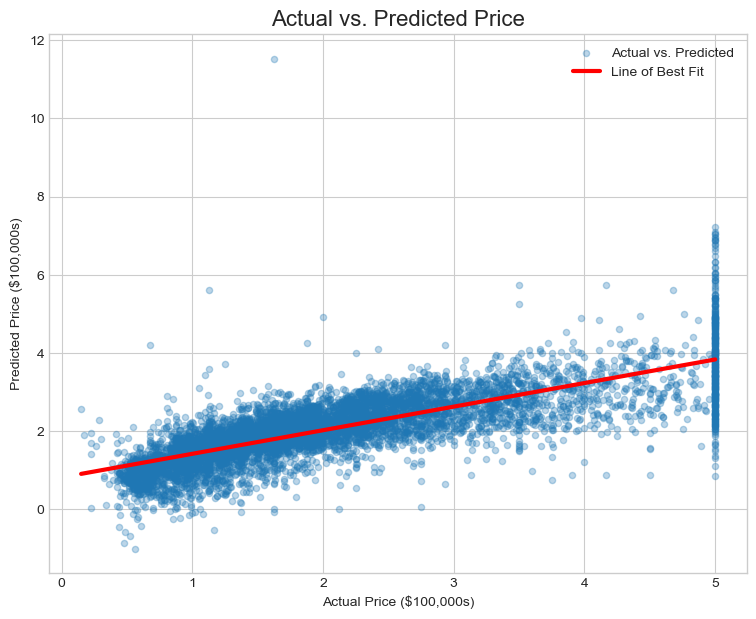

In [20]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(9, 7))

plt.scatter(y_test,pred_test, 
           alpha=0.3,  # Fixes "clunkiness" by showing density
            s=20,       # Smaller markers
            label='Actual vs. Predicted')

plt.plot(np.unique(y_test), 
      np.poly1d(np.polyfit(y_test, pred_test, 1))(np.unique(y_test)),
      linewidth = 3,
      color='red', 
      label='Line of Best Fit')

plt.title('Actual vs. Predicted Price', fontsize=16)
plt.xlabel('Actual Price ($100,000s)')  
plt.ylabel('Predicted Price ($100,000s)') 

plt.legend()

plt.show()